In [1]:
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATA = Path('./data')

In [3]:
train_df = pd.read_csv(PATH_TO_DATA / 'flight_delays_train.csv')
test_df = pd.read_csv(PATH_TO_DATA / 'flight_delays_test.csv')

### Колонки
<li>month - месяц</li>
<li>day_of_month - день месяца</li>
<li>day_of_week - день недели</li>
<li>dep_time - время отправки</li>
<li>unique_carrier - код компании перевозчика</li>
<li>origin - аэропорт отправки</li>
<li>dest - аэропорт назначения</li>
<li>distance - расстояние между origin и dest</li>
<li>dep_delayed_15min - target</li>

In [4]:
train_df.head()

month  day_of_month  day_of_week  dep_time unique_carrier origin dest  \
0      4            16            4      1309             OO    GEG  SLC   
1      3            11            3      1118             UA    LAX  ORD   
2      4             2            4       558             WN    PDX  DEN   
3      5            28            4      1540             OO    GFK  MSP   
4      7            17            5       718             AA    CLT  PHL   

   distance  dep_delayed_15min  
0       546                  0  
1      1744                  0  
2       991                  0  
3       284                  0  
4       449                  0

In [15]:
mask = np.logical_or(train_df.day_of_week == 5, train_df.day_of_week == 6)
train_df['weekend'] = mask.astype(int)
train_df.head()

month  day_of_month  day_of_week  dep_time unique_carrier origin dest  \
0      4            16            4      1309             OO    GEG  SLC   
1      3            11            3      1118             UA    LAX  ORD   
2      4             2            4       558             WN    PDX  DEN   
3      5            28            4      1540             OO    GFK  MSP   
4      7            17            5       718             AA    CLT  PHL   

   distance  dep_delayed_15min  weekend  
0       546                  0        0  
1      1744                  0        0  
2       991                  0        0  
3       284                  0        0  
4       449                  0        1

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124397 entries, 0 to 124396
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   month              124397 non-null  int64 
 1   day_of_month       124397 non-null  int64 
 2   day_of_week        124397 non-null  int64 
 3   dep_time           124397 non-null  int64 
 4   unique_carrier     124397 non-null  object
 5   origin             124397 non-null  object
 6   dest               124397 non-null  object
 7   distance           124397 non-null  int64 
 8   dep_delayed_15min  124397 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 8.5+ MB


In [11]:
train_df.duplicated(keep=False).sum()

0

In [6]:
train_df.describe()

month   day_of_month    day_of_week       dep_time  \
count  124397.000000  124397.000000  124397.000000  124397.000000   
mean        6.584090      15.711577       3.927072    1335.104946   
std         3.371553       8.754423       1.985543     496.790767   
min         1.000000       1.000000       1.000000       1.000000   
25%         4.000000       8.000000       2.000000     920.000000   
50%         7.000000      16.000000       4.000000    1330.000000   
75%         9.000000      23.000000       6.000000    1740.000000   
max        12.000000      31.000000       7.000000    2400.000000   

            distance  dep_delayed_15min  
count  124397.000000      124397.000000  
mean      825.010483           0.176170  
std       611.389317           0.380966  
min        31.000000           0.000000  
25%       372.000000           0.000000  
50%       650.000000           0.000000  
75%      1067.000000           0.000000  
max      4983.000000           1.000000

In [7]:
train_df['hour'] = train_df['dep_time'] // 100
train_df['flight'] = train_df.origin + '-' + train_df.dest
train_df

month  day_of_month  day_of_week  dep_time unique_carrier origin  \
0           4            16            4      1309             OO    GEG   
1           3            11            3      1118             UA    LAX   
2           4             2            4       558             WN    PDX   
3           5            28            4      1540             OO    GFK   
4           7            17            5       718             AA    CLT   
...       ...           ...          ...       ...            ...    ...   
124392      7            23            4      1306             UA    SAN   
124393      4            28            2      1714             EV    ALB   
124394     10            31            6      1913             UA  12266   
124395     12            22            2      1428             WN    MDW   
124396      5             3            7      1001             HA    HNL   

         dest  distance  dep_delayed_15min  hour       flight  
0         SLC       546                  0    13      GEG-SLC  
1         ORD      1744                  0    11      LAX-ORD  
2         DEN       991                  0     5      PDX-DEN  
3         MSP       284                  0    15      GFK-MSP  
4         PHL       449                  0     7      CLT-PHL  
...       ...       ...                ...   ...          ...  
124392    IAD      2253                  0    13      SAN-IAD  
124393    DTW       489                  0    17      ALB-DTW  
124394  11697       966                  0    19  12266-11697  
124395    LAS      1521                  0    14      MDW-LAS  
124396    KOA       163                  0    10      HNL-KOA  

[124397 rows x 11 columns]

In [20]:
print(train_df.dest.value_counts().head(50).sum()/train_df.dest.shape[0], train_df.dest.unique().shape[0])
print(train_df.origin.value_counts().head(50).sum()/train_df.origin.shape[0], train_df.origin.unique().shape[0])
print(train_df.unique_carrier.value_counts().head(7).sum()/train_df.unique_carrier.shape[0], train_df.unique_carrier.unique().shape[0])
dest_list = train_df.dest.value_counts().head(15).index.tolist()
dest_list

0.7440131192874426 601
0.7427751473106264 594
0.8293206427807744 14


['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'SFO',
 'IAH',
 'PHX',
 'LAS',
 'MCO',
 'SEA',
 'MSP',
 'DTW',
 'BOS',
 'SLC']

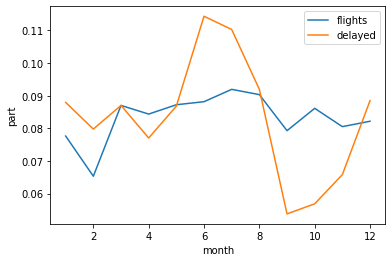

In [18]:
amount = train_df.sort_values(by='month').groupby('month').count()['dep_delayed_15min']
delayed_count = train_df.where(train_df.dep_delayed_15min == 1).sort_values(by='month').groupby('month').count()['dep_delayed_15min']
delayed_count.rename('delayed', inplace=True)
amount.rename('amount', inplace=True)
plt.plot(range(1, 13), amount/np.sum(amount), label='flights')
plt.plot(range(1, 13), delayed_count/np.sum(delayed_count), label='delayed')
plt.legend()
plt.xlabel('month')
plt.ylabel('part')
plt.show()

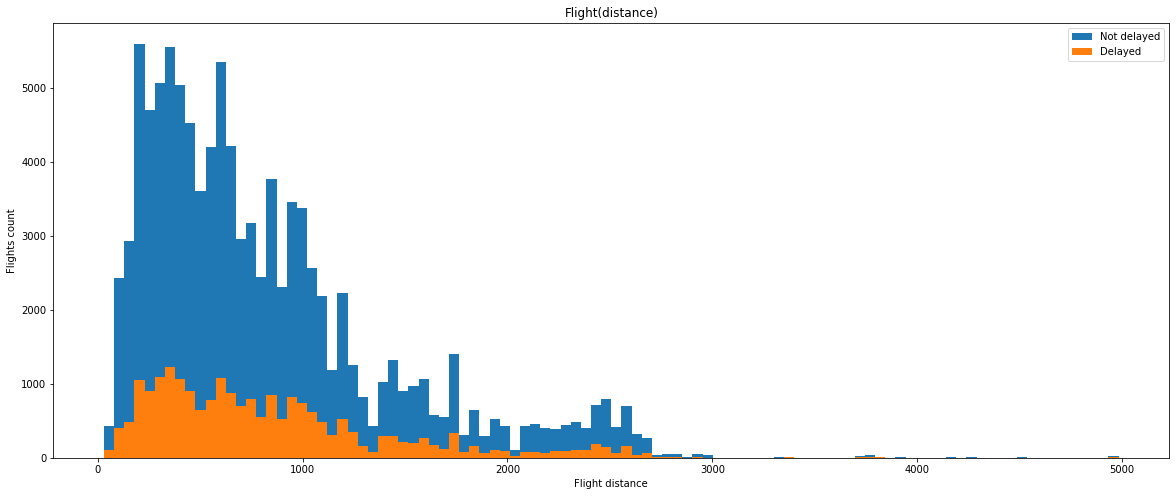

In [19]:
plt.figure(figsize=(20,8))
plt.hist(train_df['distance'][train_df['dep_delayed_15min'] == 0], bins=100, label="Not delayed")
plt.hist(train_df['distance'][train_df['dep_delayed_15min'] == 1], bins=100, label="Delayed")
plt.title("Flight(distance)")
plt.xlabel("Flight distance")
plt.ylabel("Flights count")
plt.legend()
plt.show()

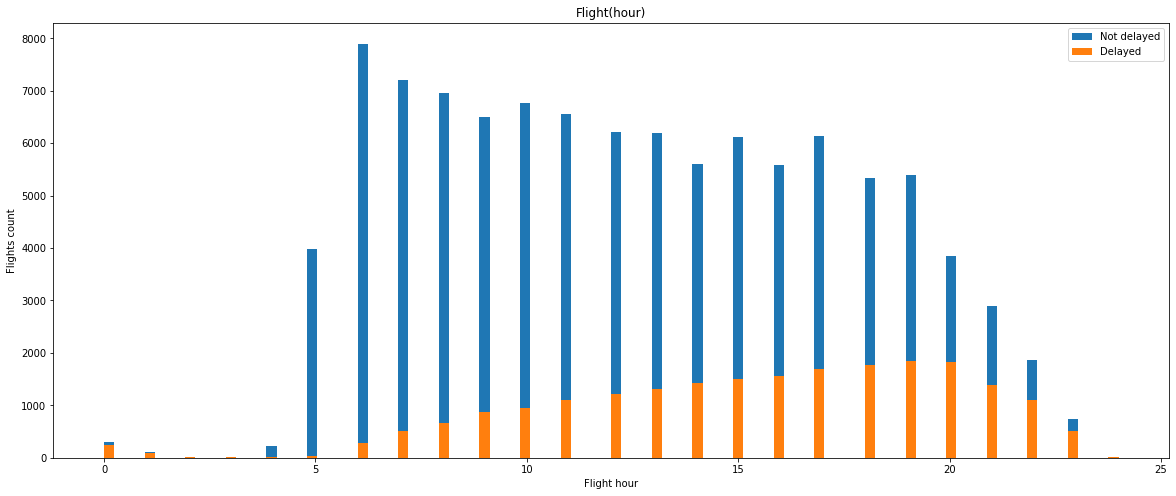

In [20]:
plt.figure(figsize=(20,8))
plt.hist(train_df['hour'][train_df['dep_delayed_15min'] == 0], bins=100, label="Not delayed")
plt.hist(train_df['hour'][train_df['dep_delayed_15min'] == 1], bins=100, label="Delayed")
plt.title("Flight(hour)")
plt.xlabel("Flight hour")
plt.ylabel("Flights count")
plt.legend()
plt.show()

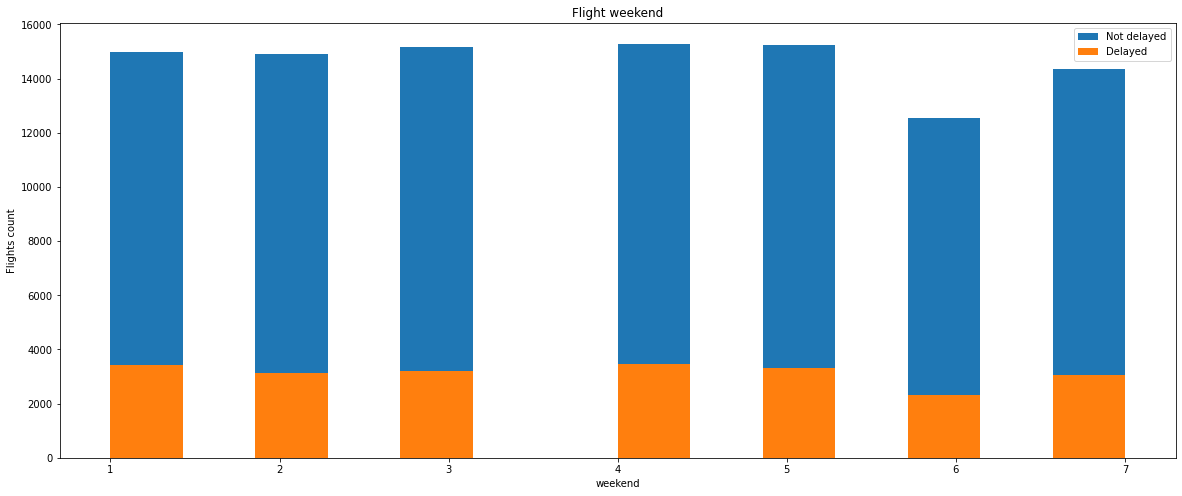

In [23]:
plt.figure(figsize=(20,8))
plt.hist(train_df['day_of_week'][train_df['dep_delayed_15min'] == 0], label="Not delayed", bins=14)
plt.hist(train_df['day_of_week'][train_df['dep_delayed_15min'] == 1], label="Delayed", bins=14)
plt.title("Flight weekend")
plt.xlabel("weekend")
plt.ylabel("Flights count")
plt.legend()
plt.show()
#train_df.dep_delayed_15min[train_df.weekend == 0].sum()/train_df.dep_delayed_15min[train_df.weekend == 0].shape[0], train_df.dep_delayed_15min[train_df.weekend == 1].sum()/train_df.dep_delayed_15min[train_df.weekend == 1].shape[0] 

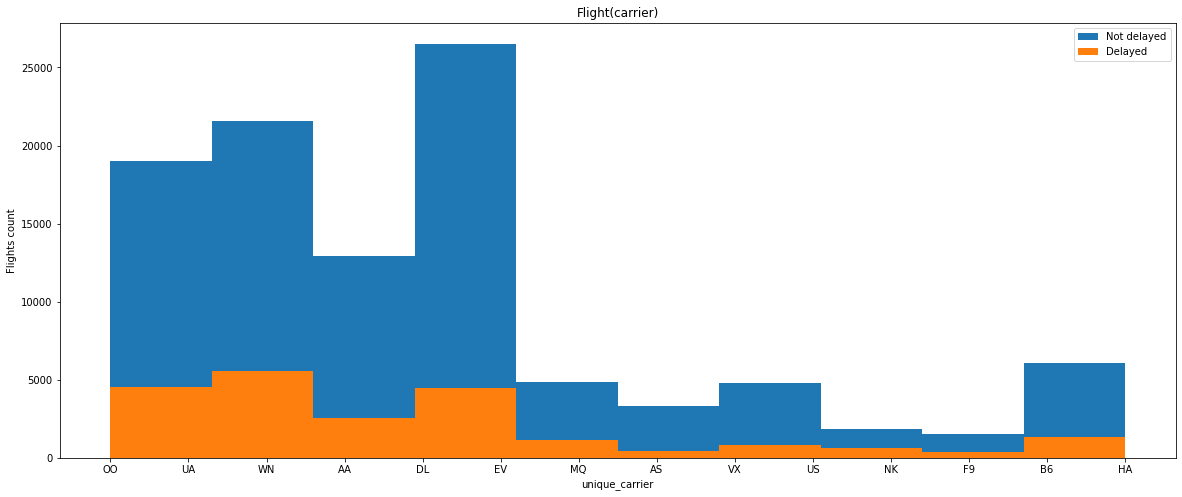

In [25]:
plt.figure(figsize=(20,8))
plt.hist(train_df['unique_carrier'][train_df['dep_delayed_15min'] == 0], label="Not delayed", )
plt.hist(train_df['unique_carrier'][train_df['dep_delayed_15min'] == 1], label="Delayed", )
plt.title("Flight(carrier)")
plt.xlabel("unique_carrier")
plt.ylabel("Flights count")
plt.legend()
plt.show()

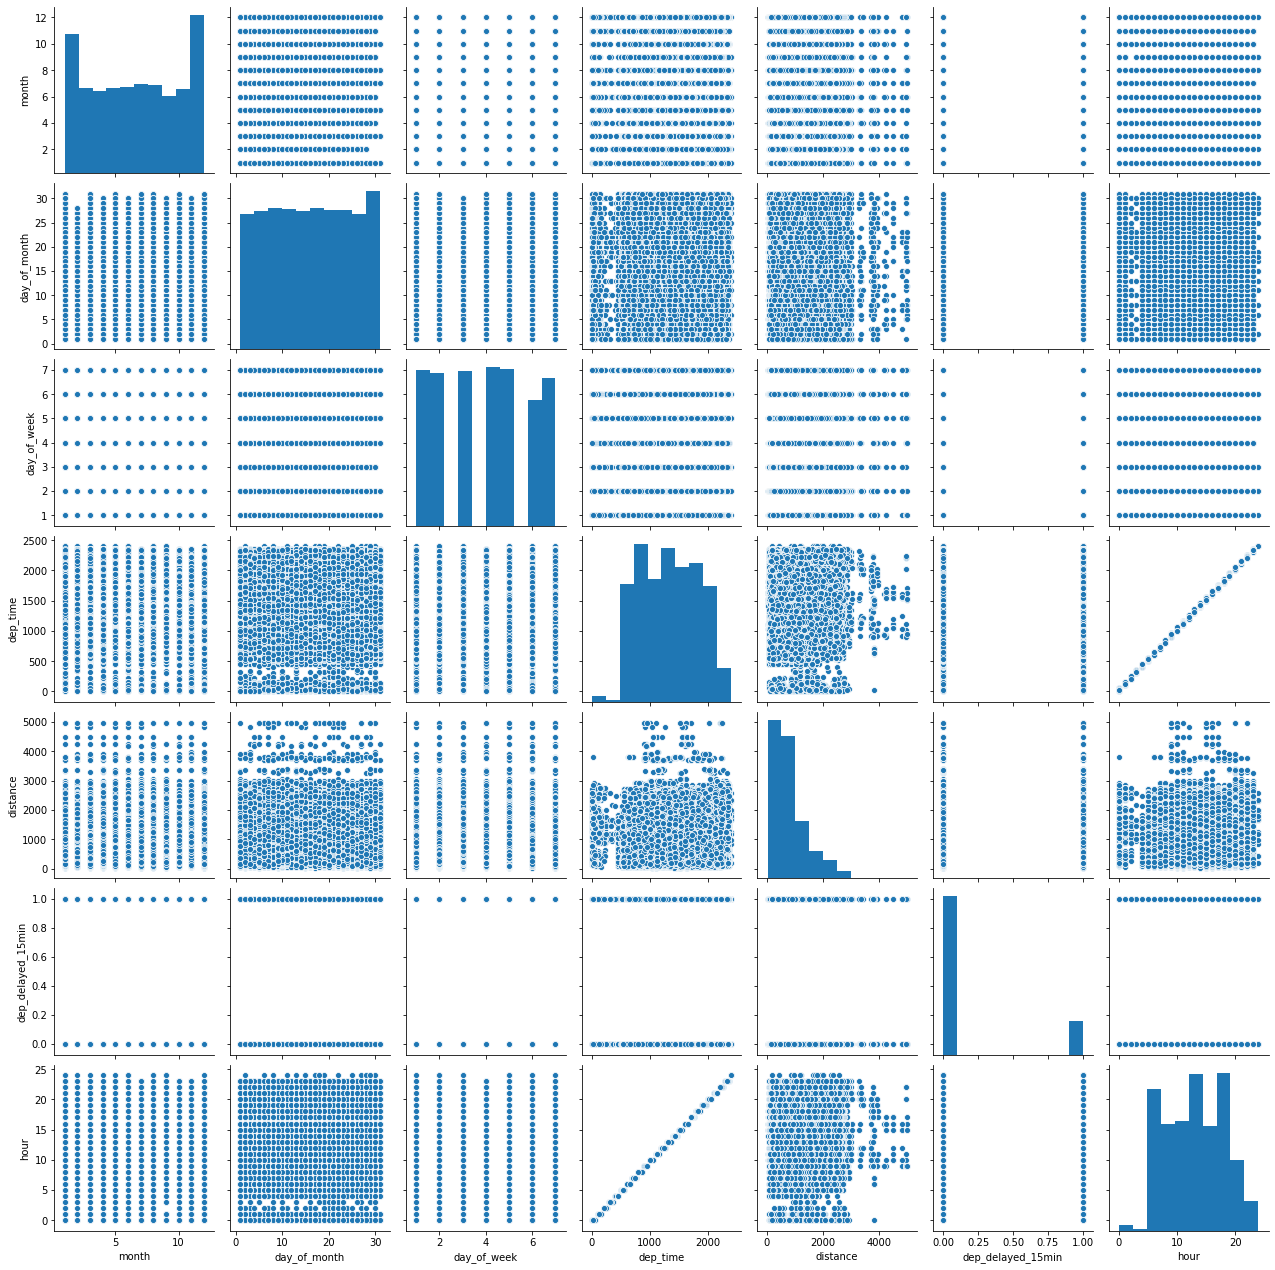

In [28]:
sns.pairplot(train_df)

In [42]:
plt.figure(figsize=(20,8))
delayed_flights = train_df[train_df['dep_delayed_15min'] == 1].groupby('flight').count().dest.rename('delayed_amount')
flights = train_df.groupby('flight').count().dest.rename('flight_amount')
delayed_flights.nlargest(10)/delayed_flights.sum()

flight
SFO-LAX    0.003057
LAX-JFK    0.002829
LAX-SFO    0.002829
ORD-DFW    0.002601
LAX-LAS    0.002145
ATL-LGA    0.002099
DFW-LAX    0.002099
LGA-ATL    0.002099
ORD-LGA    0.002099
LAS-SFO    0.002008
Name: delayed_amount, dtype: float64

<Figure size 1440x576 with 0 Axes>